In [160]:
import math
import os
from glob import glob
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import pandas as pd
import numpy as np
import seaborn as sns
matplotlib.style.use('ggplot')

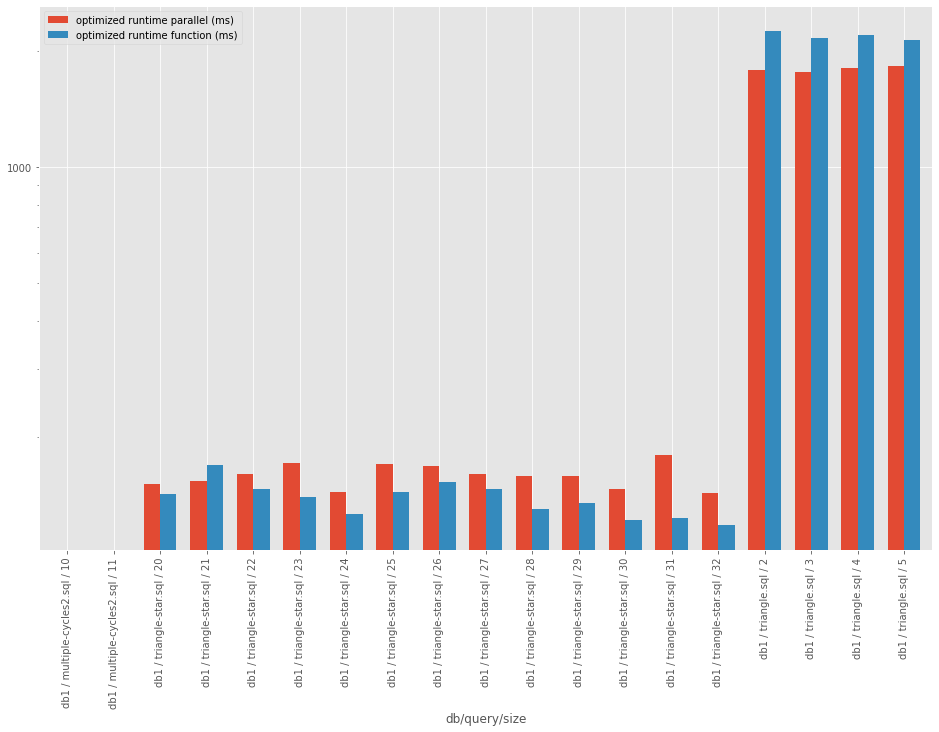

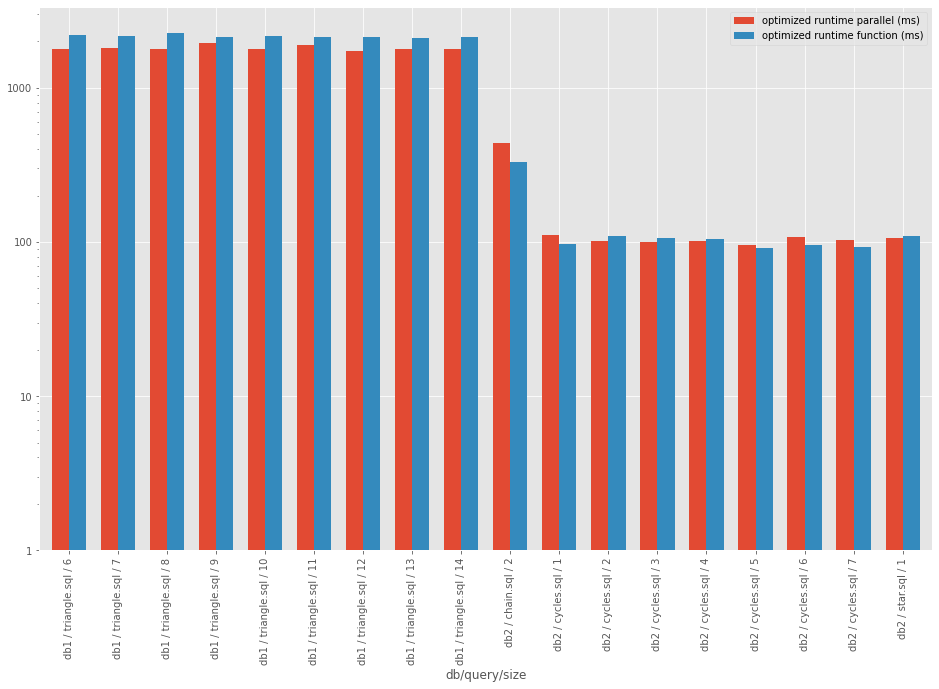

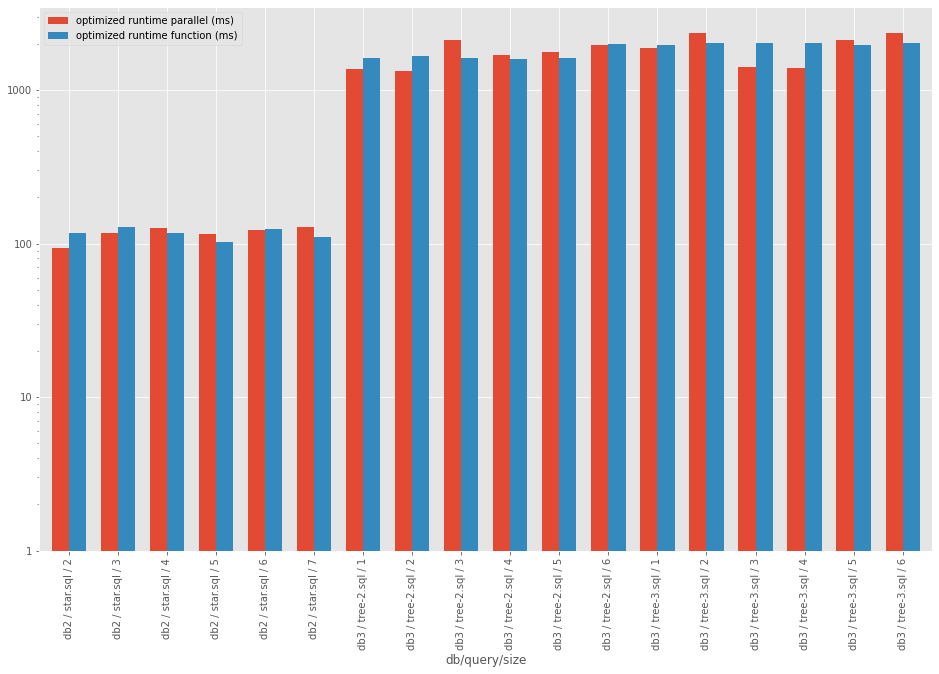

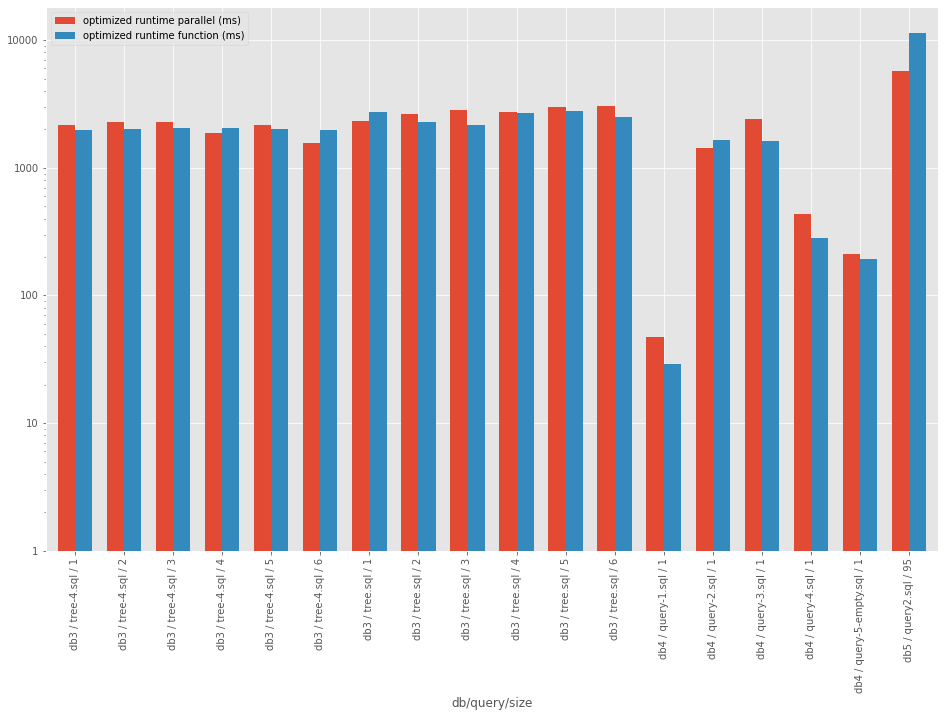

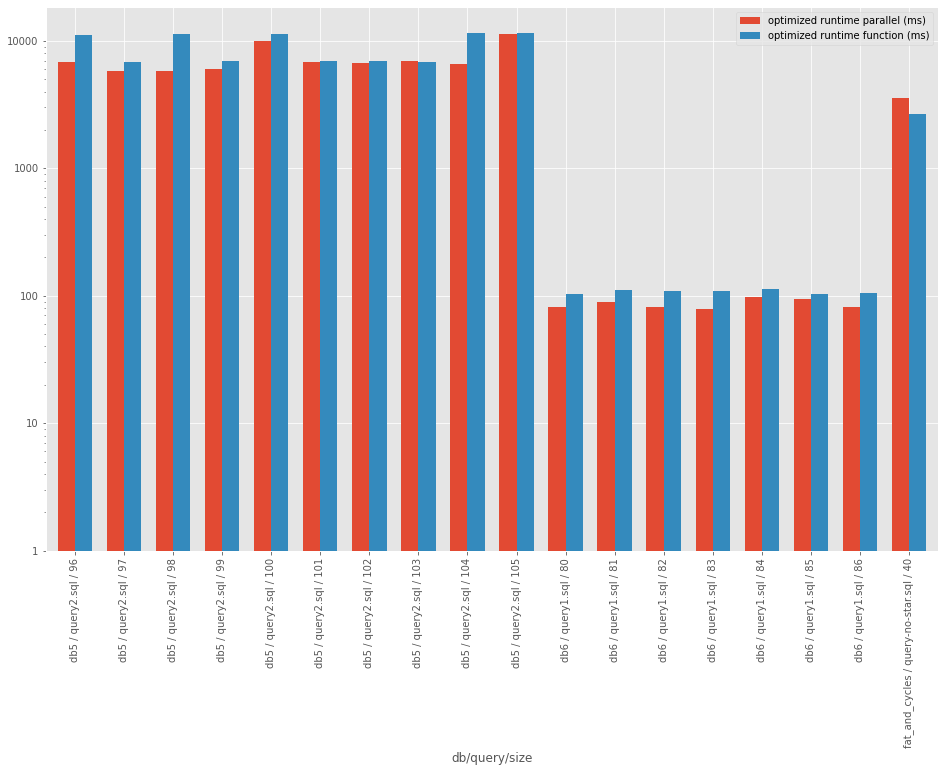

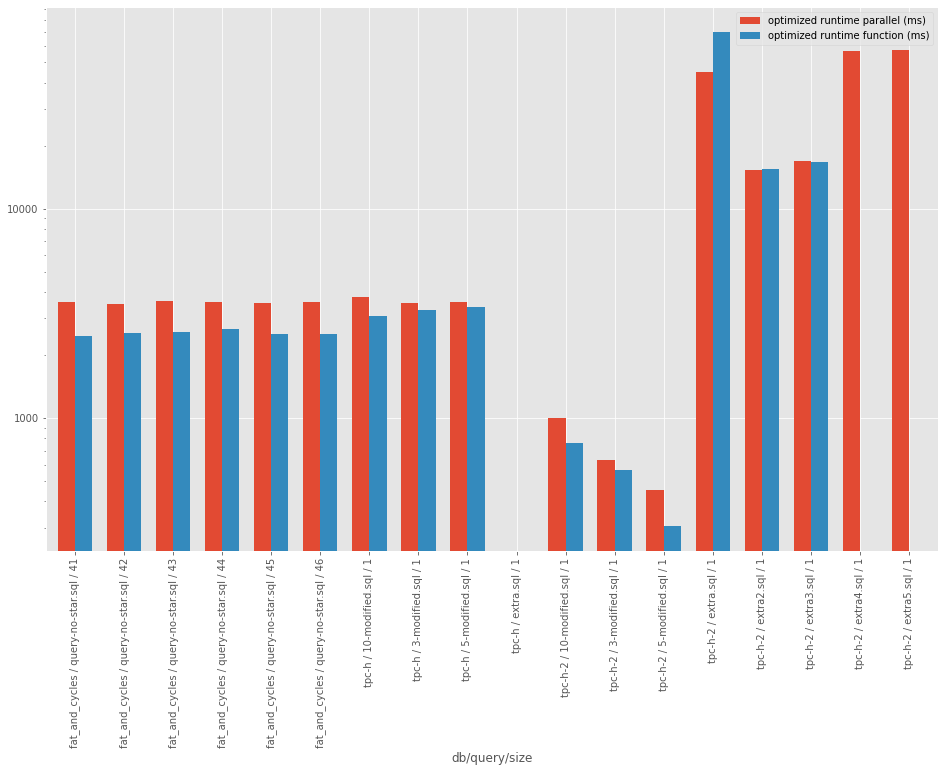

In [169]:
boolean_benchmark_path = 'benchmark-results-2021-02-06-21:46:46'
full_benchmark_path = "benchmark-results-2021-02-06-22:45:19"
function_benchmark_path = "benchmark-results-2021-02-07-00:32:09"
unweighted_benchmark_path = "benchmark-results-2021-02-07-05:09:41"
full_1thread_benchmark_path = "benchmark-results-2021-02-07-13:13:47"
full_2thread_benchmark_path = "benchmark-results-2021-02-07-17:00:50"
full_3thread_benchmark_path = "benchmark-results-2021-02-07-19:37:57"

def visualize_db(db_name, db_df, prefix):
    fig = None
    #db_df.sort_values('query', inplace=True)
    for idx, (query_name, query_df) in enumerate(db_df.groupby('query')):
        if (idx % 4 == 0):
            fig = plt.figure(figsize=(16,10))
            #fig.suptitle(db_name, fontsize=16)
        query_df.sort_values('size', inplace=True)
        ax = fig.add_subplot(2,2,(idx % 4) + 1)
        ax.set_title(query_name)
        ax.xaxis.set_tick_params(rotation=90)
        query_df[['size', 'origRuntime', 'optQueryRuntime']].plot(kind='bar', x='size', ax=ax)
        plt.savefig('graphics/' + prefix + '_' + db_name + '_' + str(math.floor(idx / 4)) + '.pdf', bbox_inches='tight')


def visualize_summary(summary_file, prefix):
    df = pd.read_csv(summary_file)
    fig = None
    
    df.sort_values('db', inplace=True)
    i = 0
    for db_name, db_df in df.groupby('db'):
        db_df.sort_values('query', inplace=True)
        for query_name, query_df in db_df.groupby('query'):
            if (i % 4 == 0):
                fig = plt.figure(figsize=(16,10))
                #fig.suptitle(db_name, fontsize=16)
            query_df.sort_values('size', inplace=True)
            ax = fig.add_subplot(2,2,(i % 4) + 1)
            ax.set_title(db_name + '/' + query_name)
            ax.xaxis.set_tick_params(rotation=90)
            query_df[['size', 'origRuntime', 'optQueryRuntime']].plot(kind='bar', x='size', ax=ax)
            plt.savefig('graphics/' + prefix + '_' + str(math.floor(i / 4)) + '.pdf', bbox_inches='tight')
            i += 1


def visualize(path, prefix):
    dbs = glob(path + '/*')
    summary_file = path + '/summary.csv'
    dbs.remove(summary_file)
    visualize_summary(summary_file, prefix)
    
def visualize_comparison2(path1, path2, name1, name2):
    df1 = pd.read_csv(path1 + '/summary.csv')
    df2 = pd.read_csv(path2 + '/summary.csv')
    df_join = pd.merge(df1, df2, on=['db', 'query', 'size'])
    
    df_join.sort_values(['db', 'query', 'size'], inplace=True)
    
    for idx, split in enumerate(np.array_split(df_join, 6)):
        fig, ax = plt.subplots()
        split['optimized runtime ' + name1 + ' (ms)'] = split['optQueryRuntime_x']
        split['optimized runtime ' + name2 + ' (ms)'] = split['optQueryRuntime_y']
        split['db/query/size'] = split['db'] + ' / ' + split['query'] + ' / ' + split['size'].astype(str)
        split[['db/query/size', 'optimized runtime ' + name1 + ' (ms)', 'optimized runtime ' + name2 + ' (ms)']].plot(kind='bar', ax=ax, width=0.7,
                                                                        x='db/query/size', figsize=(16,10), log=True)
        ax.yaxis.set_major_formatter(ScalarFormatter())
        plt.savefig('graphics/' + name1 + '_vs_' + name2 + '_' + str(idx) + '.pdf', bbox_inches='tight')
        
def visualize_comparison3(path1, path2, path3, name1, name2, name3):
    df1 = pd.read_csv(path1 + '/summary.csv')
    df2 = pd.read_csv(path2 + '/summary.csv')
    df3 = pd.read_csv(path3 + '/summary.csv')
    df_join = pd.merge(df1, df2, on=['db', 'query', 'size']).merge(df3, on=['db', 'query', 'size'])
    
    df_join.sort_values(['db', 'query', 'size'], inplace=True)
    
    for idx, split in enumerate(np.array_split(df_join, 6)):
        fig, ax = plt.subplots()
        split['optimized runtime / ' + name1 + ' (ms)'] = split['optQueryRuntime_x']
        split['optimized runtime / ' + name2 + ' (ms)'] = split['optQueryRuntime_y']
        split['optimized runtime / ' + name3 + ' (ms)'] = split['optQueryRuntime']
        split['db/query/size'] = split['db'] + ' / ' + split['query'] + ' / ' + split['size'].astype(str)
        split[['db/query/size', 'optimized runtime / ' + name1 + ' (ms)',
               'optimized runtime / ' + name2 + ' (ms)',
               'optimized runtime / ' + name3 + ' (ms)']].plot(kind='bar', ax=ax, width=0.7,
                                                                        x='db/query/size', figsize=(16,10), log=True)
        ax.yaxis.set_major_formatter(ScalarFormatter())
        plt.savefig('graphics/threads' + '_' + str(idx) + '.pdf', bbox_inches='tight')
        

os.makedirs('graphics', exist_ok=True)
visualize(boolean_benchmark_path, "boolean")
visualize(full_benchmark_path, "full")
visualize_comparison2(full_benchmark_path, unweighted_benchmark_path, 'weighted', 'unweighted')
visualize_comparison2(full_benchmark_path, function_benchmark_path, 'parallel', 'function')
visualize_comparison3(full_1thread_benchmark_path, full_2thread_benchmark_path, full_3thread_benchmark_path, '1 thread', '2 threads', '3 threads')

In [136]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>